# PART A
- Hidden_size = 100
- epochs = [25,50,100,150]
- Regular SGD using batch size =10

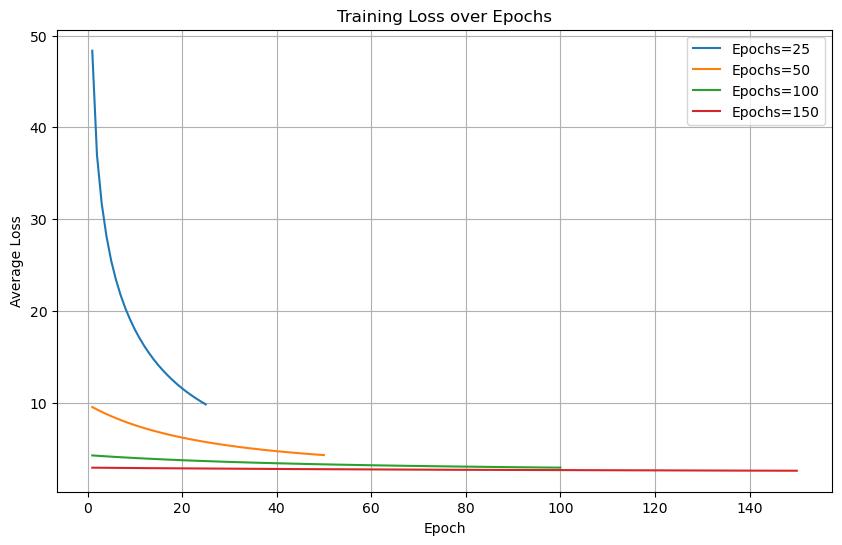

In [12]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Device configuration
device = torch.device('cpu')

# Hyperparameters
input_size = 784  # MNIST images are 28x28 pixels
hidden_size = 100
output_size = 10
epochs = [25, 50, 100, 150]  # Epochs for comparison
batch_size = 10
learning_rate = 1e-6

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Initialize weights and biases
weights_input_hidden = torch.randn(input_size, hidden_size, device=device, requires_grad=False)
biases_input_hidden = torch.randn(hidden_size, device=device, requires_grad=False)
weights_hidden_output = torch.randn(hidden_size, output_size, device=device, requires_grad=False)
biases_hidden_output = torch.randn(output_size, device=device, requires_grad=False)

# Lists to store loss values for each epoch
losses = [[] for _ in epochs]

# Training loop
for idx, num_epochs in enumerate(epochs):
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        
        for batch_idx, (data, targets) in enumerate(train_loader):
            # Move data to device
            data = data.view(-1, input_size).to(device)
            targets = targets.to(device)
            
            # Forward pass
            hidden_layer_input = torch.matmul(data, weights_input_hidden) + biases_input_hidden
            hidden_layer_output = torch.relu(hidden_layer_input)
            output = torch.matmul(hidden_layer_output, weights_hidden_output) + biases_hidden_output
            
            # Calculate loss (CrossEntropy)
            loss = torch.nn.functional.cross_entropy(output, targets)
            epoch_loss += loss.item()
            
            # Backward pass (manually compute gradients)
            grad_output = (output - targets.view(-1, 1)) / output.size(0)
            grad_hidden_output = torch.matmul(hidden_layer_output.T, grad_output)
            grad_hidden_input = torch.matmul(grad_output, weights_hidden_output.T)
            grad_hidden_input[hidden_layer_input <= 0] = 0  # ReLU derivative
            grad_weights_input_hidden = torch.matmul(data.T, grad_hidden_input)
            grad_biases_input_hidden = grad_hidden_input.sum(dim=0)
            
            # Update weights and biases using SGD
            weights_input_hidden -= learning_rate * grad_weights_input_hidden
            biases_input_hidden -= learning_rate * grad_biases_input_hidden
            weights_hidden_output -= learning_rate * grad_hidden_output
            biases_hidden_output -= learning_rate * grad_output.sum(dim=0)
        
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Batch {batch_idx+1}/{len(train_loader)}, Loss: {loss.item()}')
        
        # Store average loss for the epoch
        losses[idx].append(epoch_loss / len(train_loader))

# Plotting the training loss
plt.figure(figsize=(10, 6))
for idx, num_epochs in enumerate(epochs):
    plt.plot(range(1, num_epochs + 1), losses[idx], label=f'Epochs={num_epochs}')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


# PART C
- Hidden_size = 100
- Activation function - Relu and Tanh 
- Regular SGD

Epoch [1/25], Loss: 77836.12178850174, Accuracy: 0.1046
Epoch [2/25], Loss: 77836.12171792984, Accuracy: 0.1046
Epoch [3/25], Loss: 77836.1217136383, Accuracy: 0.1046
Epoch [4/25], Loss: 77836.1217648983, Accuracy: 0.1046
Epoch [5/25], Loss: 77836.12177348137, Accuracy: 0.1046
Epoch [6/25], Loss: 77836.12171840668, Accuracy: 0.1046
Epoch [7/25], Loss: 77836.12177038193, Accuracy: 0.1046
Epoch [8/25], Loss: 77836.12178301811, Accuracy: 0.1046
Epoch [9/25], Loss: 77836.12186455727, Accuracy: 0.1046
Epoch [10/25], Loss: 77836.12168002129, Accuracy: 0.1046
Epoch [11/25], Loss: 77836.12169933319, Accuracy: 0.1046
Epoch [12/25], Loss: 77836.1217224598, Accuracy: 0.1046
Epoch [13/25], Loss: 77836.12166953087, Accuracy: 0.1046
Epoch [14/25], Loss: 77836.12178230286, Accuracy: 0.1046
Epoch [15/25], Loss: 77836.12171149254, Accuracy: 0.1046
Epoch [16/25], Loss: 77836.12177705765, Accuracy: 0.1046
Epoch [17/25], Loss: 77836.12180280685, Accuracy: 0.1046
Epoch [18/25], Loss: 77836.12176394463, Acc

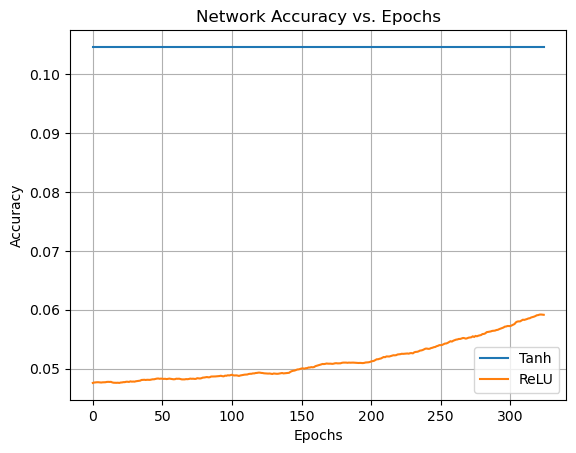

In [7]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cpu')

# Hyperparameters
input_size = 784  # MNIST images are 28x28 pixels
output_size = 10
hidden_size = 100
learning_rate = 1e-6
epochs = [25, 50, 100, 150]

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=10, shuffle=True)

# Initialize weights and biases manually
weights_input_hidden = torch.randn(input_size, hidden_size, device=device, requires_grad=False)
biases_input_hidden = torch.randn(hidden_size, device=device, requires_grad=False)
weights_hidden_output = torch.randn(hidden_size, output_size, device=device, requires_grad=False)
biases_hidden_output = torch.randn(output_size, device=device, requires_grad=False)

# Function to perform forward pass with Tanh activation function
def forward_pass_tanh(inputs, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output):
    hidden_layer_input = torch.matmul(inputs, weights_input_hidden) + biases_input_hidden
    hidden_layer_output = torch.tanh(hidden_layer_input)
    output = torch.matmul(hidden_layer_output, weights_hidden_output) + biases_hidden_output
    return output, hidden_layer_output

# Function to perform forward pass with ReLU activation function
def forward_pass_relu(inputs, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output):
    hidden_layer_input = torch.matmul(inputs, weights_input_hidden) + biases_input_hidden
    hidden_layer_output = F.relu(hidden_layer_input)
    output = torch.matmul(hidden_layer_output, weights_hidden_output) + biases_hidden_output
    return output, hidden_layer_output

# Function to compute cross-entropy loss manually
def cross_entropy_loss(outputs, labels):
    softmax_outputs = torch.exp(outputs) / torch.exp(outputs).sum(dim=1, keepdim=True)
    loss = -torch.log(softmax_outputs[range(labels.size(0)), labels]).mean()
    return loss

# Function to train the model using mini-batch SGD
def train_model(train_loader, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output, epochs, forward_pass_func):
    accuracies = []
    for num_epochs in epochs:
        for epoch in range(num_epochs):
            total_correct = 0
            total_samples = 0
            total_loss = 0
            for images, labels in train_loader:
                images = images.view(-1, input_size).to(device)
                labels = labels.to(device)

                # Forward pass
                outputs, hidden_layer_output = forward_pass_func(images, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output)

                # Calculate loss
                loss = cross_entropy_loss(outputs, labels)

                # Backward pass
                grad_loss_output = (F.softmax(outputs, dim=1) - F.one_hot(labels, 10).float()) / len(train_loader.dataset)
                grad_hidden_output = torch.matmul(torch.transpose(hidden_layer_output, 0, 1), grad_loss_output)
                grad_hidden_input = torch.matmul(grad_loss_output, torch.transpose(weights_hidden_output, 0, 1)) * (1 - torch.pow(hidden_layer_output, 2))
                grad_weights_input_hidden = torch.matmul(torch.transpose(images, 0, 1), grad_hidden_input)
                grad_biases_input_hidden = grad_hidden_input.sum(dim=0)

                # Update weights and biases
                with torch.no_grad():
                    weights_input_hidden -= learning_rate * grad_weights_input_hidden
                    biases_input_hidden -= learning_rate * grad_biases_input_hidden
                    weights_hidden_output -= learning_rate * grad_hidden_output
                    biases_hidden_output -= learning_rate * grad_loss_output.sum(dim=0)

                # Calculate accuracy
                total_correct += (torch.argmax(outputs, dim=1) == labels).sum().item()
                total_samples += labels.size(0)

                # Calculate total loss
                total_loss += loss.item()

            # Calculate accuracy for the epoch
            epoch_acc = total_correct / total_samples
            accuracies.append(epoch_acc)

            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss}, Accuracy: {epoch_acc:.4f}')

    return accuracies

# Train the model with Tanh activation function
accuracies_tanh = train_model(train_loader, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output, epochs, forward_pass_tanh)

# Train the model with ReLU activation function
accuracies_relu = train_model(train_loader, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output, epochs, forward_pass_relu)

# Plotting the accuracy against epochs for Tanh and ReLU activation functions
plt.plot(range(sum(epochs)), accuracies_tanh, label='Tanh')
plt.plot(range(sum(epochs)), accuracies_relu, label='ReLU')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Network Accuracy vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()